<a href="https://colab.research.google.com/github/SwathiNagilla/Swathi_INFO5731_FALL2024/blob/main/Nagilla_Swathi_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [15]:
 # Import and install necessary libraries
!pip install gensim nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

# Download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Sample Data
data = [
    "The American Revolutionary War was a conflict between the Thirteen American Colonies and Great Britain.",
    "The Declaration of Independence was signed on July 4, 1776, marking the United States' independence from Britain.",
    "The Civil War took place from 1861 to 1865, fought between the Northern states and the Southern Confederate states over issues like slavery.",
    "The Civil Rights Movement in the 1960s aimed to end racial discrimination and secure equal rights for African Americans.",
    "The Great Depression was a severe worldwide economic depression that took place mostly during the 1930s.",
    "World War II involved the United States joining the Allies to fight against the Axis powers, with the war ending in 1945.",
    "The Cold War was a period of tension between the United States and the Soviet Union, lasting from the late 1940s until the early 1990s.",
    "The women's suffrage movement led to the 19th Amendment, granting American women the right to vote in 1920.",
    "The Louisiana Purchase in 1803 doubled the size of the United States, acquired from France under President Thomas Jefferson.",
    "The Industrial Revolution transformed the American economy from agrarian to industrial, leading to urbanization and new technologies."
]

# Preprocessing the Data
stop_words = set(stopwords.words('english'))
processed_data = [[word for word in word_tokenize(doc.lower()) if word.isalnum() and word not in stop_words]
                  for doc in data]

# Creating Dictionary and Corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Function to Calculate Coherence Scores for Different K
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    list1 = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        list1.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return list1, coherence_values

# Calculate Coherence for Different K
list1, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus,
                                                  texts=processed_data, start=2, limit=10, step=1)

# Identify Optimal K
optimal_index = np.argmax(coherence_values)
optimal_model = list1[optimal_index]

# Displaying output
print(f"Optimal Number of Topics: {optimal_index + 2}")
topics = optimal_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Optimal Number of Topics: 9
(0, '0.098*"independence" + 0.052*"july" + 0.052*"britain" + 0.052*"marking" + 0.052*"1776"')
(1, '0.050*"1803" + 0.050*"doubled" + 0.050*"president" + 0.050*"acquired" + 0.050*"thomas"')
(2, '0.063*"american" + 0.063*"women" + 0.063*"industrial" + 0.033*"transformed" + 0.033*"led"')
(3, '0.090*"rights" + 0.047*"movement" + 0.047*"aimed" + 0.047*"equal" + 0.047*"1960s"')
(4, '0.011*"war" + 0.011*"states" + 0.011*"american" + 0.011*"britain" + 0.011*"united"')
(5, '0.011*"states" + 0.011*"war" + 0.011*"united" + 0.011*"american" + 0.011*"great"')
(6, '0.047*"tension" + 0.047*"1940s" + 0.047*"cold" + 0.047*"period" + 0.047*"1990s"')
(7, '0.063*"states" + 0.063*"war" + 0.043*"place" + 0.043*"took" + 0.043*"depression"')
(8, '0.109*"american" + 0.057*"revolutionary" + 0.057*"conflict" + 0.057*"colonies" + 0.057*"britain"')


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [17]:
# Import and install necessary libraries
!pip install nltk scikit-learn gensim
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora

# Download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Sample Data
data = [
    "The American Revolutionary War was a conflict between the Thirteen American Colonies and Great Britain.",
    "The Declaration of Independence was signed on July 4, 1776, marking the United States' independence from Britain.",
    "The Civil War took place from 1861 to 1865, fought between the Northern states and the Southern Confederate states over issues like slavery.",
    "The Civil Rights Movement in the 1960s aimed to end racial discrimination and secure equal rights for African Americans.",
    "The Great Depression was a severe worldwide economic depression that took place mostly during the 1930s.",
    "World War II involved the United States joining the Allies to fight against the Axis powers, with the war ending in 1945.",
    "The Cold War was a period of tension between the United States and the Soviet Union, lasting from the late 1940s until the early 1990s.",
    "The women's suffrage movement led to the 19th Amendment, granting American women the right to vote in 1920.",
    "The Louisiana Purchase in 1803 doubled the size of the United States, acquired from France under President Thomas Jefferson.",
    "The Industrial Revolution transformed the American economy from agrarian to industrial, leading to urbanization and new technologies."
]

# Text Preprocessing
stop_words = set(stopwords.words('english'))
data_processed = [' '.join([word for word in word_tokenize(doc.lower()) if word.isalnum() and word not in stop_words])
                  for doc in data]

# Count Vectorizer Transformation
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(data_processed)
terms = vectorizer.get_feature_names_out()

# Finding Optimal K for LSA
def compute_coherence_values_lsa(vectorized_data, terms, texts, limit, start=2, step=1):
    coherence_values = []
    list1 = []  # Changed to list1 for model list

    for num_topics in range(start, limit, step):
        # Train LSA Model
        lsa_model = TruncatedSVD(n_components=num_topics, random_state=100)
        lsa_model.fit(vectorized_data)
        list1.append(lsa_model)

        # Extract Topics
        topics = [[terms[i] for i in lsa_model.components_[t].argsort()[-5:]] for t in range(num_topics)]

        # Compute Coherence Score
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')  # Use dictionary instead of id2word
        coherence_values.append(coherence_model.get_coherence())

    return list1, coherence_values

# Calculating Coherence Scores
dictionary = corpora.Dictionary([doc.split() for doc in data_processed])  # Dictionary needed for coherence model
list1, coherence_values = compute_coherence_values_lsa(data_vectorized, terms, data_processed, limit=10)

# Optimal Model Selection
optimal_index = np.argmax(coherence_values)
optimal_model = list1[optimal_index]

# Display Output
print(f"Optimal Number of Topics for LSA: {optimal_index + 2}")
for topic_idx, topic in enumerate(optimal_model.components_):
    print(f"Topic {topic_idx + 1}: ", [terms[i] for i in topic.argsort()[-5:]])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Optimal Number of Topics for LSA: 2
Topic 1:  ['took', 'place', 'united', 'war', 'states']
Topic 2:  ['industrial', 'rights', 'movement', 'women', 'american']


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [9]:
#import and install Required Libraries
!pip install bertopic
!pip install sentence-transformers
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Download NLTK Stopwords
nltk.download('stopwords')
nltk.download('punkt')

#Sample Data
data = [
    "The American Revolutionary War was a conflict between the Thirteen American Colonies and Great Britain.",
    "The Declaration of Independence was signed on July 4, 1776, marking the United States' independence from Britain.",
    "The Civil War took place from 1861 to 1865, fought between the Northern states and the Southern Confederate states over issues like slavery.",
    "The Civil Rights Movement in the 1960s aimed to end racial discrimination and secure equal rights for African Americans.",
    "The Great Depression was a severe worldwide economic depression that took place mostly during the 1930s.",
    "World War II involved the United States joining the Allies to fight against the Axis powers, with the war ending in 1945.",
    "The Cold War was a period of tension between the United States and the Soviet Union, lasting from the late 1940s until the early 1990s.",
    "The women's suffrage movement led to the 19th Amendment, granting American women the right to vote in 1920.",
    "The Louisiana Purchase in 1803 doubled the size of the United States, acquired from France under President Thomas Jefferson.",
    "The Industrial Revolution transformed the American economy from agrarian to industrial, leading to urbanization and new technologies."
]

# Initialize BERTopic Model
topic_model = BERTopic()

#Fit the BERTopic Model to the Data
topics, _ = topic_model.fit_transform(data)

# Step 7: Display Topics
topic_info = topic_model.get_topic_info()
print("Topic Information:\n", topic_info)

# Step 8: Visualize Topics with Custom Parameters
# Use top_n_topics to limit the visualization to avoid errors due to insufficient topics
num_topics = len(topic_info)
if num_topics > 1:
    topic_model.visualize_topics(top_n_topics=num_topics)
else:
    print("Insufficient unique topics for visualization.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic Information:
    Topic  Count                   Name  \
0     -1     10  -1_the_to_states_from   

                                      Representation  \
0  [the, to, states, from, war, and, united, amer...   

                                 Representative_Docs  
0  [World War II involved the United States joini...  
Insufficient unique topics for visualization.


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.028*"states" + 0.028*"rights" + 0.028*"civil" + 0.028*"independence" + 0.016*"african" + 0.016*"secure" + 0.016*"racial" + 0.016*"aimed" + 0.016*"equal" + 0.016*"fought"
Topic 1: 0.034*"united" + 0.019*"movement" + 0.019*"acquired" + 0.019*"france" + 0.019*"doubled" + 0.019*"purchase" + 0.019*"size" + 0.019*"louisiana" + 0.019*"president" + 0.019*"lasting"
Topic 2: 0.051*"war" + 0.036*"american" + 0.035*"depression" + 0.035*"great" + 0.020*"britain." + 0.020*"took" + 0.020*"place" + 0.020*"united" + 0.020*"states" + 0.020*"fight"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


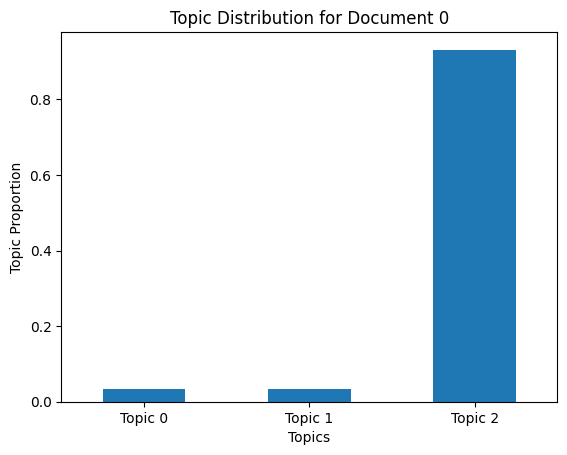

In [18]:
#import and install Required Libraries
!pip install gensim pyLDAvis
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# Download NLTK Stopwords
nltk.download('stopwords')

# Sample Data
data = [
    "The American Revolutionary War was a conflict between the Thirteen American Colonies and Great Britain.",
    "The Declaration of Independence was signed on July 4, 1776, marking the United States' independence from Britain.",
    "The Civil War took place from 1861 to 1865, fought between the Northern states and the Southern Confederate states over issues like slavery.",
    "The Civil Rights Movement in the 1960s aimed to end racial discrimination and secure equal rights for African Americans.",
    "The Great Depression was a severe worldwide economic depression that took place mostly during the 1930s.",
    "World War II involved the United States joining the Allies to fight against the Axis powers, with the war ending in 1945.",
    "The Cold War was a period of tension between the United States and the Soviet Union, lasting from the late 1940s until the early 1990s.",
    "The women's suffrage movement led to the 19th Amendment, granting American women the right to vote in 1920.",
    "The Louisiana Purchase in 1803 doubled the size of the United States, acquired from France under President Thomas Jefferson.",
    "The Industrial Revolution transformed the American economy from agrarian to industrial, leading to urbanization and new technologies."
]

# Preprocess the Data
stop_words = stopwords.words('english')
texts = [[word for word in doc.lower().split() if word not in stop_words] for doc in data]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Visualize the Topics with pyLDAvis
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(visualization)

# Visualize Document Topic Distribution
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distribution = [lda_model.get_document_topics(bow) for bow in corpus]

# Creat a DataFrame for better visualization
dataframe = pd.DataFrame([[doc_idx] + [topic[1] for topic in lda_model.get_document_topics(bow)] for doc_idx, bow in enumerate(corpus)],
                  columns=["Document"] + [f"Topic {i}" for i in range(lda_model.num_topics)])

# Plot the topic distribution
dataframe.iloc[0, 1:].plot(kind='bar', title='Topic Distribution for Document 0')
plt.ylabel('Topic Proportion')
plt.xlabel('Topics')
plt.xticks(rotation=0)
plt.show()


1. **LDA Model Topics Visualization**
**Purpose:** This section of the code displays the topics generated by the LDA model, along with the words that are most important to each subject.

 **Interpretation:** Each topic is represented as a list of words with weights assigned. Words with higher weights have a stronger connection to the subject. This helps us understand the major points of each topic and can assist us when we study or classify them further.


---


2. **PyLDAvis visualization**
**Purpose**: This interactive display created by pyLDAvis allows users to explore themes from the LDA model.

**Interpretation**: The display depicts subjects in a 2D space, with the spacing between circles (topics) representing how similar they are. The size of each circle corresponds to the proportion of documents related to that topic. Users can move their mouse over topics to see the most relevant terms and how they relate to one another, allowing them to better comprehend what the model produced.


---



3. **Document Topic Distribution Visualization**
**Purpose**: This bar chart depicts how subjects are distributed throughout a specific document (in this case, Document 0).

**Interpretation**: Each bar represents a topic's share of the document. The bar's height indicates how common that topic is in the text. This visual assistance assists in determining which subjects are most significant in the document and can provide insights into the content of individual publications.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

**LDA (Latent Dirichlet Allocation)**

**Strengths:** It provides straightforward and understandable themes. It works effectively for identifying diverse themes in large amounts of data.

**Weaknesses:** You must specify how many themes you want ahead of time, which may affect what you receive.

---



**LSA (Latent Semantic Analysis)**




**Strengths**: It excels at recognizing large picture connections and dealing with words that signify the same thing.

**Weaknesses**: The concepts it introduces are more difficult to grasp. It struggles with dispersed data, which means it's less effective at discovering detailed details about history.

---
**BERTopic**

**Strengths**: It creates meaningful themes and provides excellent tools for demonstrating them. It employs specialized computer language models to capture nuanced concepts effectively.

**Weaknesses**: It requires more computer power and resources to operate.


---
I Think BERTopic takes the top spot when you need to whip up detailed, context-fitting topics from bunches of data, all thanks to its awesome grasp of meaning and killer graphics skills. On the flip side, you’ve got LDA being the go-to for easy peasy understanding and no-fuss use, whereas LSA has a knack for zooming out for the big picture even though it might slip on the little details. When it boils right down to it picking the champ hinges on what you’re looking to dig into, like how easy you need things to be how beefy your computer setup is, and the kind of data you're tossing around.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Working with topic modeling methods like as LDA, LSA, and BERTopic really improved my understanding of feature extraction from text data.
The hands-on experience helped me understand their capabilities and applications, although I had difficulty setting hyperparameters and
debugging errors, notably with BERTopic's visualization. This exercise is extremely relevant to NLP because topic modeling is critical for
extracting insights from unstructured text. The abilities I learned will be useful in applications such as sentiment analysis and document
classification, reinforcing my foundational knowledge for additional studies in the discipline.
'''